In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SP_all_daily = pd.read_csv('SP_all_daily.csv')
SP_all_daily = SP_all_daily.sort_values('Date', ascending=True, ignore_index=True)
SP_all_daily = SP_all_daily.set_index('Date')
SP_all_daily

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek
Date,,,,,,,,,,,,,,,,,,,,,
1927-12-30,17.66,17.66,1.260000e+06,NaN,NaN,0,17.76,2.0,4.520,4.060,...,1257.719971,0.0,1.1895,0.24,17.240000,17.240000,1927,12,30,4
1928-01-03,17.76,17.76,1.260000e+06,17.66,0.566251,2,17.72,1.0,4.520,4.060,...,1257.719971,0.0,1.1895,0.24,17.240000,17.240000,1928,1,3,1
1928-01-04,17.72,17.72,1.260000e+06,17.76,-0.225225,1,17.55,0.0,4.520,4.060,...,1257.719971,0.0,1.1895,0.24,17.240000,17.240000,1928,1,4,2
1928-01-05,17.55,17.55,1.260000e+06,17.72,-0.959368,0,17.66,2.0,4.520,4.060,...,1257.719971,0.0,1.1895,0.24,17.240000,17.240000,1928,1,5,3
1928-01-06,17.66,17.66,1.260000e+06,17.55,0.626781,2,17.50,0.0,4.520,4.060,...,1257.719971,0.0,1.1895,0.24,17.240000,17.240000,1928,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,3986.16,0.0,2.798,3.110,...,27878.960938,64100000.0,1.3011,-0.17,26.860001,26.209999,2022,8,29,0
2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,0,3955.00,0.0,2.873,3.110,...,28195.580078,60700000.0,1.3092,0.62,25.750000,26.209999,2022,8,30,1
2022-08-31,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0,3966.85,1.0,2.860,3.133,...,28091.529297,86200000.0,1.3127,0.27,25.860001,25.870001,2022,8,31,2


In [3]:
def MovingAverage(days):
    total = 0
    for day in range(days):
        total+= SP_all_daily['S&P_Close'].shift(day)
    return round(total/days,2)

In [4]:
SP_all_daily['MA30'] = MovingAverage(30)
SP_all_daily['MA50'] = MovingAverage(50)
SP_all_daily['MA200'] = MovingAverage(200)

In [5]:
SP_all_daily = SP_all_daily.dropna() 
SP_all_daily.head()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
Date,,,,,,,,,,,,,,,,,,,,,
1928-10-16,21.72,21.72,1260000.0,21.65,0.323326,1,21.79,1.0,4.52,4.06,...,0.24,17.24,17.24,1928,10,16,1,21.24,20.69,19.18
1928-10-17,21.79,21.79,1260000.0,21.72,0.322284,1,21.84,1.0,4.52,4.06,...,0.24,17.24,17.24,1928,10,17,2,21.27,20.73,19.20
1928-10-18,21.84,21.84,1260000.0,21.79,0.229463,1,21.96,2.0,4.52,4.06,...,0.24,17.24,17.24,1928,10,18,3,21.29,20.78,19.22
1928-10-19,21.96,21.96,1260000.0,21.84,0.549451,2,21.81,0.0,4.52,4.06,...,0.24,17.24,17.24,1928,10,19,4,21.33,20.83,19.25
1928-10-22,21.81,21.81,1260000.0,21.96,-0.683060,0,21.95,2.0,4.52,4.06,...,0.24,17.24,17.24,1928,10,22,0,21.35,20.88,19.27


In [6]:
SP_all_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23583 entries, 1928-10-16 to 2022-09-01
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P_Open          23583 non-null  float64
 1   S&P_Close         23583 non-null  float64
 2   S&P_Volume        23583 non-null  float64
 3   Close_t-1         23583 non-null  float64
 4   return(%)         23583 non-null  float64
 5   return_class      23583 non-null  int64  
 6   Close_t+1         23583 non-null  float64
 7   t+1_return_class  23583 non-null  float64
 8   t_3m_Close        23583 non-null  float64
 9   t_10y_Close       23583 non-null  float64
 10  cpi_Value         23583 non-null  float64
 11  cpi_MoM%          23583 non-null  float64
 12  oil_Price         23583 non-null  float64
 13  unemp_rate        23583 non-null  float64
 14  PE_Ratio          23583 non-null  float64
 15  Div_Ratio         23583 non-null  float64
 16  EY_Ratio          23583 non-nul

## Exploratory Data Analysis

In [7]:
# Let's try with only after 1986 data 
SP_all_daily = SP_all_daily[SP_all_daily.index >= '1986-01-01']

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 6.000e+00, 8.000e+00, 1.200e+01, 1.500e+01,
        3.600e+01, 5.400e+01, 9.500e+01, 1.570e+02, 2.680e+02, 4.750e+02,
        8.760e+02, 1.505e+03, 1.029e+03, 5.500e+02, 2.960e+02, 1.200e+02,
        8.200e+01, 3.000e+01, 2.400e+01, 1.700e+01, 1.000e+01, 8.000e+00,
        4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-11.98405028, -11.51276856, -11.04148683, -10.5702051 ,
        -10.09892338,  -9.62764165,  -9.15635993,  -8.6850782 ,
         -8.21379647,  -7.74251475,  -7.27123302,  -6.79995129,
         -6.32866957,  -5.85738784,  -5.38610612,  -4.91482439,
         -4.44354266,  -3.97226094,  -3.50097921,  -3.02969748,
         -2.55841576,  -2.08713403,  -1.61585231,  -1.14

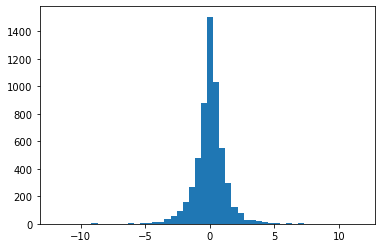

In [8]:
plt.hist(SP_all_daily['return(%)'], bins = 50)

In [9]:
SP_all_daily.loc[SP_all_daily['return(%)'] <= -10]

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-16,2508.59,2386.13,7.781540e+09,2711.02,-11.98405,0,2529.19,2.0,0.185,0.728,...,1.54,57.830002,82.690002,2020,3,16,0,3114.57,3180.43,3047.16


1987 Oct - Black Monday
1998 Aug - Russian Financial crisis
2002 Sep - .com bubble burst
2008 Oct/2009 Feb - US Financial crisis
2020 Mar - Covid 
There is always a market crash at some point after rapid recovery from recessions 

In [10]:
SP_all_daily.loc[SP_all_daily['return(%)'] >= 10]

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-13,912.75,1003.35,7.263370e+09,899.22,11.580036,2,998.01,0.0,0.21,3.861,...,-2.30,69.949997,54.990002,2008,10,13,0,1159.42,1208.66,1312.38
2008-10-28,848.92,940.51,7.096950e+09,848.92,10.789002,2,930.09,0.0,0.75,3.820,...,-1.88,73.300003,66.959999,2008,10,28,1,1044.13,1130.03,1284.87


In [11]:
SP_all_daily[SP_all_daily['return_class']==2].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
count,1610.000000,1610.000000,1.610000e+03,1610.000000,1610.000000,1610.0,1610.000000,1610.000000,1610.000000,1610.000000,...,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1812.719217,1831.523565,3.354318e+09,1809.133112,1.291007,2.0,1830.957292,0.993168,1.433207,3.190769,...,-0.239994,22.480335,21.397851,2010.640994,6.372671,15.398758,1.988199,1817.220671,1816.642925,1791.624820
std,970.799109,977.353838,1.601794e+09,966.352763,0.978119,0.0,977.448598,0.710800,1.728460,1.381168,...,0.533957,9.805695,9.116009,6.724837,3.423895,8.942117,1.380584,966.182106,962.278605,917.739879
min,679.280000,712.870000,4.048700e+08,676.530000,0.500066,2.0,682.550000,0.000000,-0.105000,0.536000,...,-3.510000,9.100000,9.150000,2000.000000,1.000000,1.000000,0.000000,758.780000,788.960000,870.670000
25%,1139.815000,1156.885000,1.811080e+09,1139.442500,0.708671,2.0,1152.840000,0.000000,0.080750,2.072500,...,-0.550000,15.852500,14.970000,2005.000000,3.000000,8.000000,1.000000,1142.775000,1137.800000,1157.002500
50%,1386.040000,1401.565000,3.458020e+09,1386.155000,1.007066,2.0,1400.825000,1.000000,0.870000,3.000500,...,-0.200000,20.495000,19.469999,2010.000000,6.000000,15.000000,2.000000,1399.750000,1411.505000,1392.265000
75%,2182.557500,2194.352500,4.221515e+09,2178.685000,1.495463,2.0,2197.427500,1.000000,2.124250,4.220750,...,0.080000,26.107501,25.225000,2016.000000,9.000000,23.000000,3.000000,2171.682500,2168.160000,2096.470000
max,4778.140000,4796.560000,1.008269e+10,4766.180000,11.580036,2.0,4793.540000,2.000000,6.180000,6.684000,...,1.810000,82.690002,75.910004,2022.000000,12.000000,31.000000,4.000000,4681.970000,4678.140000,4496.290000


In [12]:
SP_all_daily[SP_all_daily['return_class']==1].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
count,2697.000000,2697.000000,2.697000e+03,2697.000000,2697.000000,2697.0,2697.000000,2697.000000,2697.000000,2697.000000,...,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,1903.765139,1904.156148,3.072829e+09,1903.722807,0.022697,1.0,1904.626088,1.038191,1.449856,3.115597,...,-0.003018,17.314142,17.090630,2011.465332,6.633667,15.936596,2.040415,1883.654501,1873.983589,1818.913726
std,904.630808,904.795455,1.220239e+09,904.558612,0.263373,0.0,905.539701,0.689866,1.695811,1.277287,...,0.447637,6.114097,5.917939,6.198467,3.418729,8.718397,1.409563,890.218415,883.744359,838.441412
min,684.040000,683.380000,3.560700e+08,682.550000,-0.498714,1.0,676.530000,0.000000,-0.028000,0.515000,...,-2.530000,9.010000,9.140000,2000.000000,1.000000,1.000000,0.000000,771.800000,789.230000,870.570000
25%,1227.250000,1227.730000,2.233200e+09,1227.160000,-0.180469,1.0,1229.010000,1.000000,0.075000,2.093000,...,-0.270000,12.910000,12.810000,2006.000000,4.000000,8.000000,1.000000,1221.880000,1218.180000,1199.880000
50%,1496.070000,1497.740000,3.210170e+09,1496.450000,0.028259,1.0,1495.420000,1.000000,0.907000,2.814000,...,0.000000,15.640000,15.510000,2012.000000,7.000000,16.000000,2.000000,1475.830000,1473.090000,1439.010000
75%,2372.520000,2373.470000,3.754570e+09,2375.310000,0.230391,1.0,2373.470000,2.000000,2.167000,4.236000,...,0.270000,20.299999,19.980000,2017.000000,10.000000,24.000000,3.000000,2362.730000,2349.600000,2224.640000
max,4804.510000,4793.540000,7.946710e+09,4796.560000,0.499571,1.0,4796.560000,2.000000,6.220000,6.781000,...,2.010000,80.620003,72.000000,2022.000000,12.000000,31.000000,4.000000,4695.010000,4681.010000,4496.730000


In [13]:
SP_all_daily[SP_all_daily['return_class']==0].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek,MA30,MA50,MA200
count,1397.000000,1397.000000,1.397000e+03,1397.000000,1397.000000,1397.0,1397.000000,1397.000000,1397.000000,1397.000000,...,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,1768.088261,1746.441782,3.379997e+09,1771.294860,-1.428834,0.0,1747.954531,1.086614,1.571554,3.351064,...,0.280587,23.340594,24.449334,2009.882606,6.330709,15.724409,2.024338,1774.497745,1775.062777,1758.096650
std,972.755486,963.643135,1.794828e+09,976.763022,1.065839,0.0,963.821031,0.801378,1.776863,1.391804,...,0.600594,10.026665,10.444772,6.851827,3.388123,8.611351,1.401793,974.631354,971.476826,931.776502
min,680.760000,676.530000,4.583100e+08,683.380000,-11.984050,0.0,683.380000,0.000000,-0.058000,0.499000,...,-3.700000,9.790000,10.770000,2000.000000,1.000000,1.000000,0.000000,758.490000,789.540000,872.300000
25%,1136.470000,1121.060000,1.543600e+09,1136.470000,-1.732813,0.0,1123.090000,0.000000,0.092000,2.177000,...,-0.090000,16.340000,17.500000,2004.000000,3.000000,8.000000,1.000000,1138.220000,1136.700000,1148.340000
50%,1357.090000,1341.470000,3.512920e+09,1357.160000,-1.103743,0.0,1339.870000,1.000000,1.003000,3.371000,...,0.240000,21.250000,22.260000,2009.000000,6.000000,16.000000,2.000000,1365.210000,1368.700000,1376.070000
75%,2077.340000,2058.900000,4.414280e+09,2079.610000,-0.752664,0.0,2058.200000,2.000000,2.302000,4.388000,...,0.570000,26.990000,28.209999,2015.000000,9.000000,23.000000,3.000000,2077.050000,2066.630000,2054.420000
max,4787.990000,4700.580000,1.145623e+10,4793.540000,-0.500160,0.0,4712.020000,2.000000,6.210000,6.748000,...,3.340000,79.129997,82.690002,2022.000000,12.000000,31.000000,4.000000,4696.300000,4680.970000,4496.910000


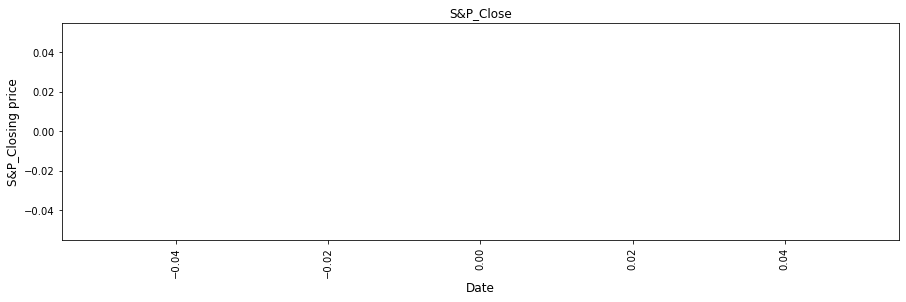

"\nplt.figure(figsize=(15,4))\nplt.title('Treausry bill(3M) rate')\nplt.plot(SP_all_daily['t_3m_Close'])\nplt.show()\n\nplt.figure(figsize=(15,4))\nplt.title('Treasury note(10Y) rate')\nplt.plot(SP_all_daily['t_10y_Close'])\nplt.show()\n\nplt.figure(figsize=(15,4))\nplt.title('Consumer Price Index')\nplt.plot(SP_all_daily['cpi_Value'])\nplt.show()\n\nplt.figure(figsize=(15,4))\nplt.title('CPI_MoM%')\nplt.plot(SP_all_daily['cpi_MoM%'])\nplt.show()\n\nplt.figure(figsize=(15,4))\nplt.title('Crude Oil Price')\nplt.plot(SP_all_daily['oil_Price'])\nplt.show()\n\nplt.figure(figsize=(15,4))\nplt.title('umeployment rate')\nplt.plot(SP_all_daily['unemp_rate'])\nplt.show()\n"

In [14]:
#visualize the data
plt.figure(figsize=(15,4))
# Create a color palette
palette = plt.get_cmap('Set1')

plt.title('S&P_Close')
plt.xlabel('Date',fontsize=12)
plt.ylabel('S&P_Closing price',fontsize=12)
plt.plot(SP_all_daily['S&P_Close'][8500:], marker='', color = 'blue')
plt.plot(SP_all_daily['MA30'][8500:], marker='', color = 'red')
plt.plot(SP_all_daily['MA50'][8500:], marker='', color = 'green')
plt.plot(SP_all_daily['MA200'][8500:], marker='', color = 'orange')
# Add legend
plt.xticks(rotation=90)
plt.show()
'''
plt.figure(figsize=(15,4))
plt.title('Treausry bill(3M) rate')
plt.plot(SP_all_daily['t_3m_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Treasury note(10Y) rate')
plt.plot(SP_all_daily['t_10y_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Consumer Price Index')
plt.plot(SP_all_daily['cpi_Value'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('CPI_MoM%')
plt.plot(SP_all_daily['cpi_MoM%'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Crude Oil Price')
plt.plot(SP_all_daily['oil_Price'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('umeployment rate')
plt.plot(SP_all_daily['unemp_rate'])
plt.show()
'''

Box plot

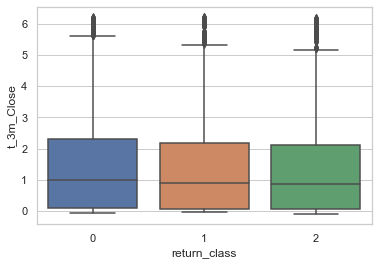

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='t_3m_Close', data=SP_all_daily)

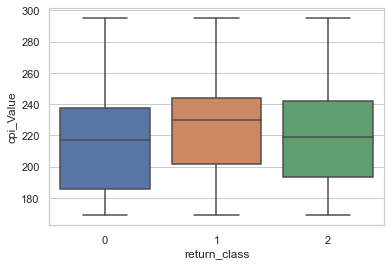

In [16]:
ax = sns.boxplot(x='return_class', y='cpi_Value', data=SP_all_daily)

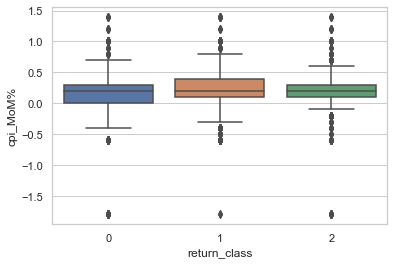

In [17]:
ax = sns.boxplot(x='return_class', y='cpi_MoM%', data=SP_all_daily)

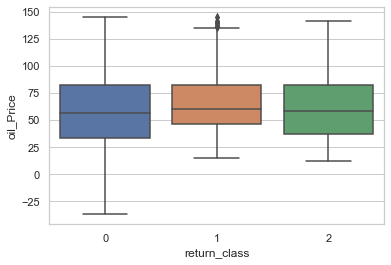

In [18]:
ax = sns.boxplot(x='return_class', y='oil_Price', data=SP_all_daily)

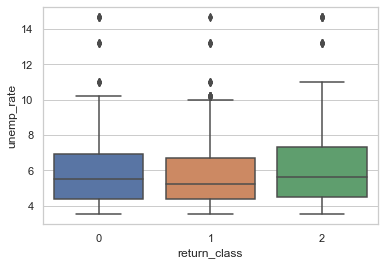

In [19]:
ax = sns.boxplot(x='return_class', y='unemp_rate', data=SP_all_daily)

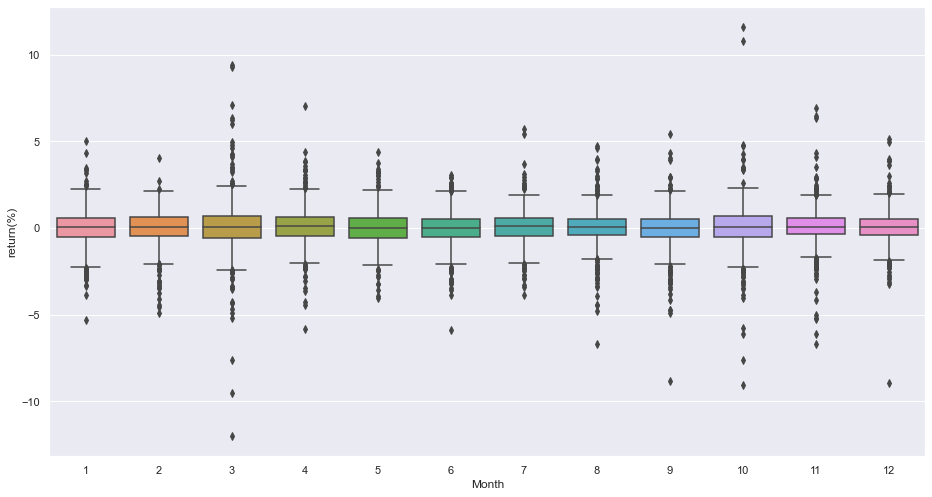

In [20]:
# Dailly S&P index return
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Month', y='return(%)', data=SP_all_daily)

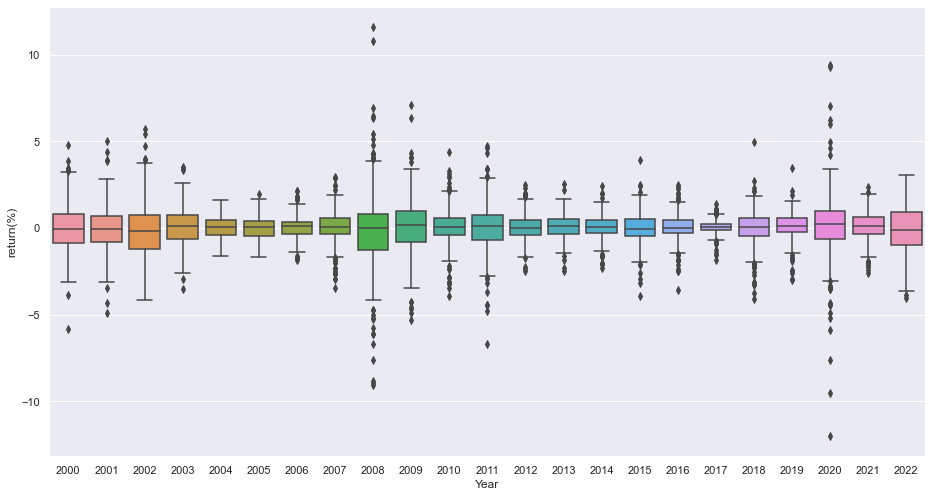

In [21]:
# Daily S&P Index return per year 
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Year', y='return(%)', data=SP_all_daily)


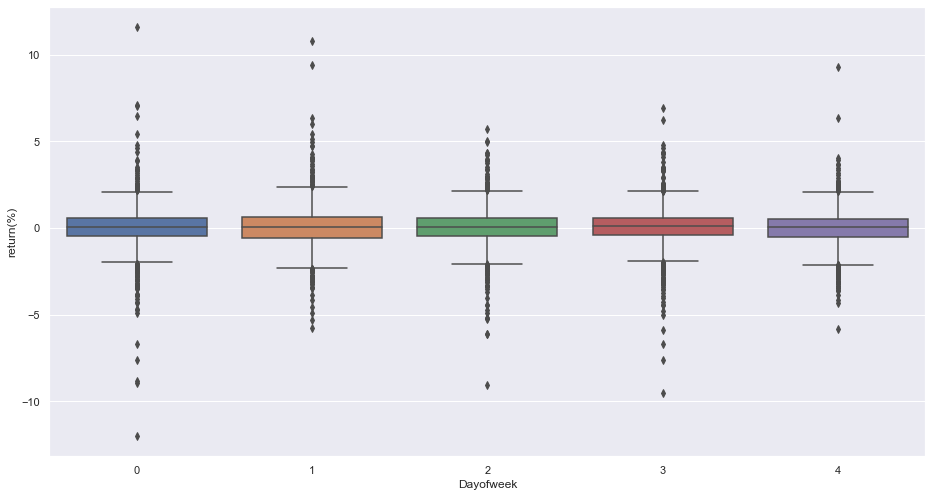

In [22]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Dayofweek', y='return(%)', data=SP_all_daily)

August 1982 - October 1987 : annualized return 17.6% 
October 19, 1987 market crash a.k.a. Black Monday
2000 dot-com bubble burst
2008 - 2009 financial crisis 

<AxesSubplot:>

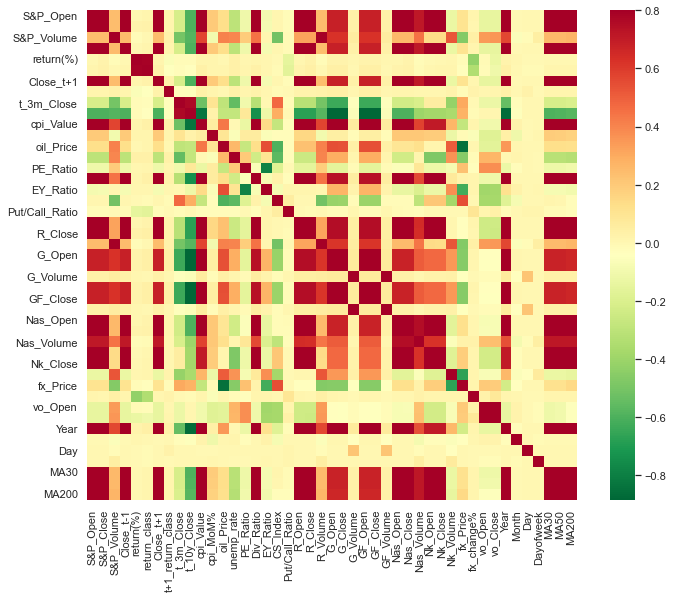

In [23]:
#Let's look at a correlation matrix between numeric attributes:
#correlation matrix
corrmat = SP_all_daily.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

## First baseline model 

#### modeling

In [24]:
# 1. scaling
# 2. building a model (Logistic Regression, Naive Bayes, Decision Tree/Random Forest, SVM, KNN?)

In [25]:
X = SP_all_daily.drop(['Year','Month','Close_t+1','t+1_return_class'], axis=1)
y = SP_all_daily['t+1_return_class']

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.1914972 , 0.18900105, 0.05186682, ..., 0.16938095, 0.1568762 ,
        0.13131146],
       [0.18809618, 0.17545746, 0.05882167, ..., 0.16918795, 0.15737979,
        0.1314521 ],
       [0.17456966, 0.17611037, 0.06571347, ..., 0.1690305 , 0.15793733,
        0.13164513],
       ...,
       [0.81497759, 0.8033024 , 0.25535758, ..., 0.85472128, 0.82751506,
        0.94588207],
       [0.80514056, 0.79573935, 0.3100667 , ..., 0.85468065, 0.82849398,
        0.94487831],
       [0.78964082, 0.79861554, 0.30616676, ..., 0.85440892, 0.82955512,
        0.94389109]])

In [27]:
# Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=27)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score

logreg_clf = LogisticRegression(multi_class = 'multinomial', max_iter=300)
LDA_clf = LinearDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC()
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
# Logistic regression
logreg_clf.fit(X_train,y_train)
y_pred = logreg_clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
score = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.49789621318373073
Test set precision, recall, f-score: (0.4605155563383397, 0.49789621318373073, 0.4426640160037566, None)


In [31]:
# LDA 
LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred_LDA)
score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.5063113604488079
Test set precision, recall, f-score: (0.47196499215435295, 0.5063113604488079, 0.4536265387169352, None)


# KNN
KNN_clf.fit(X_train,y_train)
y_pred_KNN = KNN_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
score = precision_recall_fscore_support(y_test, y_pred_KNN, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

In [33]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.46774193548387094
Test set precision, recall, f-score: (0.4464056482440563, 0.46774193548387094, 0.4422935651734222, None)


In [34]:
# Decision Tree
DT_clf.fit(X_train,y_train)
y_pred_DT = DT_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_DT)
score = precision_recall_fscore_support(y_test, y_pred_DT, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.40953716690042075
Test set precision, recall, f-score: (0.40521504882100007, 0.40953716690042075, 0.40687642144749236, None)


In [35]:
# XGBoost
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.47545582047685836
Test set precision, recall, f-score: (0.4431533240920033, 0.47545582047685836, 0.4496875342399366, None)


In [36]:
# Random Forest
RF_clf.fit(X_train,y_train)
y_pred_RF = RF_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
score = precision_recall_fscore_support(y_test, y_pred_RF, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.485273492286115
Test set precision, recall, f-score: (0.33867733679009054, 0.485273492286115, 0.37760706593119964, None)


In [37]:
# SVM
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.48667601683029454
Test set precision, recall, f-score: (0.4395555838704716, 0.48667601683029454, 0.4274375217219502, None)


### Feature selection

Part 1: Removing Features With Small Variance

In [38]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
X_transformed = vt.fit_transform(X)

In [39]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = X.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
X_transformed = pd.DataFrame(X_transformed, columns = selected_columns)

In [40]:
X_transformed

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,...,Nk_Close,Nk_Volume,fx_change%,vo_Open,vo_Close,Day,Dayofweek,MA30,MA50,MA200
0,1469.25,1455.22,9.318000e+08,1469.25,-0.954909,0.0,5.270,6.548,168.800,0.3,...,19002.859375,0.0,0.04,24.360001,24.209999,3.0,0.0,1425.48,1399.53,1346.75
1,1455.22,1399.42,1.009000e+09,1455.22,-3.834472,0.0,5.270,6.485,168.800,0.3,...,19002.859375,0.0,0.37,24.940001,27.010000,4.0,1.0,1424.72,1401.49,1347.26
2,1399.42,1402.11,1.085500e+09,1399.42,0.192222,1.0,5.270,6.599,168.800,0.3,...,18542.550781,0.0,-0.17,27.980000,26.410000,5.0,2.0,1424.10,1403.66,1347.96
3,1402.11,1403.45,1.092300e+09,1402.11,0.095570,1.0,5.240,6.549,168.800,0.3,...,18168.269531,0.0,0.69,26.680000,25.730000,6.0,3.0,1424.06,1406.09,1348.64
4,1403.45,1441.47,1.225200e+09,1403.45,2.709038,2.0,5.220,6.504,168.800,0.3,...,18193.410156,0.0,-0.25,25.139999,21.719999,7.0,4.0,1424.87,1408.98,1349.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,4198.74,4057.66,3.175260e+09,4199.12,-3.368801,0.0,2.755,3.035,295.271,0.0,...,28641.380859,49100000.0,0.84,22.070000,25.559999,26.0,4.0,4115.91,3996.19,4307.05
5700,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0.0,2.798,3.110,295.271,0.0,...,27878.960938,64100000.0,-0.17,26.860001,26.209999,29.0,0.0,4122.57,4003.46,4303.97
5701,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,0.0,2.873,3.110,295.271,0.0,...,28195.580078,60700000.0,0.62,25.750000,26.209999,30.0,1.0,4124.22,4009.69,4300.66
5702,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0.0,2.860,3.133,295.271,0.0,...,28091.529297,86200000.0,0.27,25.860001,25.870001,31.0,2.0,4124.06,4013.50,4297.02


In [41]:
X

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,...,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Day,Dayofweek,MA30,MA50,MA200
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1469.25,1455.22,9.318000e+08,1469.25,-0.954909,0,5.270,6.548,168.800,0.3,...,0.0,1.4466,0.04,24.360001,24.209999,3,0,1425.48,1399.53,1346.75
2000-01-04,1455.22,1399.42,1.009000e+09,1455.22,-3.834472,0,5.270,6.485,168.800,0.3,...,0.0,1.4520,0.37,24.940001,27.010000,4,1,1424.72,1401.49,1347.26
2000-01-05,1399.42,1402.11,1.085500e+09,1399.42,0.192222,1,5.270,6.599,168.800,0.3,...,0.0,1.4495,-0.17,27.980000,26.410000,5,2,1424.10,1403.66,1347.96
2000-01-06,1402.11,1403.45,1.092300e+09,1402.11,0.095570,1,5.240,6.549,168.800,0.3,...,0.0,1.4595,0.69,26.680000,25.730000,6,3,1424.06,1406.09,1348.64
2000-01-07,1403.45,1441.47,1.225200e+09,1403.45,2.709038,2,5.220,6.504,168.800,0.3,...,0.0,1.4558,-0.25,25.139999,21.719999,7,4,1424.87,1408.98,1349.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,4198.74,4057.66,3.175260e+09,4199.12,-3.368801,0,2.755,3.035,295.271,0.0,...,49100000.0,1.3033,0.84,22.070000,25.559999,26,4,4115.91,3996.19,4307.05
2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,2.798,3.110,295.271,0.0,...,64100000.0,1.3011,-0.17,26.860001,26.209999,29,0,4122.57,4003.46,4303.97
2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,0,2.873,3.110,295.271,0.0,...,60700000.0,1.3092,0.62,25.750000,26.209999,30,1,4124.22,4009.69,4300.66


Part 2: Removing Correlated Features

In [42]:
# step 1
X_corr = X_transformed.corr().abs()

# step 2
indices = np.where(X_corr > 0.9) 
indices = [(X_corr.index[x], X_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        X_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [43]:
print(indices)

[('S&P_Open', 'S&P_Close'), ('S&P_Open', 'Close_t-1'), ('S&P_Open', 'R_Open'), ('S&P_Open', 'R_Close'), ('S&P_Open', 'Nas_Open'), ('S&P_Open', 'Nas_Close'), ('S&P_Open', 'Nk_Open'), ('S&P_Open', 'Nk_Close'), ('S&P_Open', 'MA30'), ('S&P_Open', 'MA50'), ('S&P_Open', 'MA200'), ('S&P_Close', 'Close_t-1'), ('S&P_Close', 'R_Open'), ('S&P_Close', 'R_Close'), ('S&P_Close', 'Nas_Open'), ('S&P_Close', 'Nas_Close'), ('S&P_Close', 'Nk_Open'), ('S&P_Close', 'Nk_Close'), ('S&P_Close', 'MA30'), ('S&P_Close', 'MA50'), ('S&P_Close', 'MA200'), ('S&P_Volume', 'R_Volume'), ('Close_t-1', 'R_Open'), ('Close_t-1', 'R_Close'), ('Close_t-1', 'Nas_Open'), ('Close_t-1', 'Nas_Close'), ('Close_t-1', 'Nk_Open'), ('Close_t-1', 'Nk_Close'), ('Close_t-1', 'MA30'), ('Close_t-1', 'MA50'), ('Close_t-1', 'MA200'), ('cpi_Value', 'Div_Ratio'), ('cpi_Value', 'R_Open'), ('cpi_Value', 'R_Close'), ('cpi_Value', 'G_Open'), ('cpi_Value', 'G_Close'), ('cpi_Value', 'GF_Open'), ('cpi_Value', 'GF_Close'), ('Div_Ratio', 'R_Open'), ('D

In [44]:
X_transformed

,S&P_Open,S&P_Volume,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,CS_Index,G_Volume,Nas_Volume,Nk_Volume,fx_change%,vo_Open,Day,Dayofweek
0,1469.25,9.318000e+08,-0.954909,0.0,5.270,6.548,168.800,0.3,25.76,4.0,29.66,3.37,105.4,2.0,1.510070e+09,0.0,0.04,24.360001,3.0,0.0
1,1455.22,1.009000e+09,-3.834472,0.0,5.270,6.485,168.800,0.3,25.56,4.0,29.66,3.37,105.4,2.0,1.511840e+09,0.0,0.37,24.940001,4.0,1.0
2,1399.42,1.085500e+09,0.192222,1.0,5.270,6.599,168.800,0.3,24.65,4.0,29.66,3.37,105.4,2.0,1.735670e+09,0.0,-0.17,27.980000,5.0,2.0
3,1402.11,1.092300e+09,0.095570,1.0,5.240,6.549,168.800,0.3,24.79,4.0,29.66,3.37,105.4,2.0,1.598320e+09,0.0,0.69,26.680000,6.0,3.0
4,1403.45,1.225200e+09,2.709038,2.0,5.220,6.504,168.800,0.3,24.79,4.0,29.66,3.37,105.4,2.0,1.634930e+09,0.0,-0.25,25.139999,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,4198.74,3.175260e+09,-3.368801,0.0,2.755,3.035,295.271,0.0,93.63,3.5,20.93,4.78,50.0,202.0,4.510480e+09,49100000.0,0.84,22.070000,26.0,4.0
5700,4034.58,2.963020e+09,-0.666640,0.0,2.798,3.110,295.271,0.0,97.40,3.5,20.93,4.78,50.0,950.0,4.183740e+09,64100000.0,-0.17,26.860001,29.0,0.0
5701,4041.25,3.190580e+09,-1.102811,0.0,2.873,3.110,295.271,0.0,97.40,3.5,20.93,4.78,50.0,385.0,4.630720e+09,60700000.0,0.62,25.750000,30.0,1.0
5702,4000.67,3.797860e+09,-0.781705,0.0,2.860,3.133,295.271,0.0,97.40,3.5,19.98,5.00,50.0,385.0,4.911500e+09,86200000.0,0.27,25.860001,31.0,2.0


Part 3: Forward Regression

from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=8)
X_transformed = skb.fit_transform(X, y)

# this will give us the position of top 10 columns
skb.get_support()
# column names
X.columns[skb.get_support()]
X_transformed = pd.DataFrame(X_transformed,columns=X.columns[skb.get_support()])

X

### Second modeling

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=27)

In [46]:
logreg_clf = LogisticRegression(multi_class = 'multinomial', max_iter=300)
LDA_clf = LinearDiscriminantAnalysis() # Similar to PCA, to separate it with PCA 
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC()
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
# Logistic regression
logreg_clf.fit(X_train,y_train)
y_pred = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
score = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.49789621318373073
Test set precision, recall, f-score: (0.4605155563383397, 0.49789621318373073, 0.4426640160037566, None)


In [48]:
# LDA 
LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LDA)
score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.5063113604488079
Test set precision, recall, f-score: (0.47196499215435295, 0.5063113604488079, 0.4536265387169352, None)


# KNN
KNN_clf.fit(X_train,y_train)
y_pred_KNN = KNN_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
score = precision_recall_fscore_support(y_test, y_pred_KNN, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

In [49]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.46774193548387094
Test set precision, recall, f-score: (0.4464056482440563, 0.46774193548387094, 0.4422935651734222, None)


In [50]:
# Decision Tree
DT_clf.fit(X_train,y_train)
y_pred_DT = DT_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_DT)
score = precision_recall_fscore_support(y_test, y_pred_DT, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.41164095371669
Test set precision, recall, f-score: (0.4100320134716298, 0.41164095371669, 0.41060159265470314, None)


In [51]:
# XGBoost
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.47545582047685836
Test set precision, recall, f-score: (0.4431533240920033, 0.47545582047685836, 0.4496875342399366, None)


In [52]:
# Random Forest
RF_clf.fit(X_train,y_train)
y_pred_RF = RF_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
score = precision_recall_fscore_support(y_test, y_pred_RF, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.485273492286115
Test set precision, recall, f-score: (0.33867733679009054, 0.485273492286115, 0.37760706593119964, None)


In [53]:
# SVM
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.48667601683029454
Test set precision, recall, f-score: (0.4395555838704716, 0.48667601683029454, 0.4274375217219502, None)
